In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

plt.style.use('ggplot')

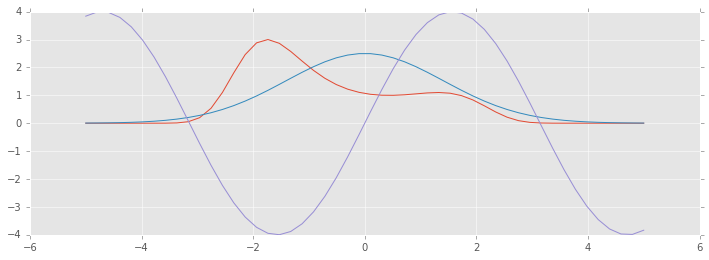

In [56]:
def P_star(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

def Q_star(x):
    return 2.5*np.exp(-x**2/4.0)

def phi(x):
    return 4*np.sin(x)

x = np.linspace(-5, 5)


plt.figure(figsize=(12,4))
plt.plot(x, P_star(x))
plt.plot(x, Q_star(x))
plt.plot(x, phi(x))

The expectation value of phi in the probability density, $P(x)$ is about -1.3186311907073391.

In [60]:
prec = -1.3186311907073391

Q sampler. 

In [34]:
max = P_star(-1.75233)
def Q_samples(N):
    sample = []
    steps = (5.0-(-5.0))/N
    x = np.random.uniform(-5,5,N)
    for i in range(N):
        if np.random.uniform(0,max)< Q_star(x[i]):
            sample = sample +[x[i]]
    return len(sample), sample

In [43]:
def weight(N):
    n,s = Q_samples(N)
    w = np.zeros(n)
    for i in range(n):
        w[i] = P_star(s[i])/Q_star(s[i])
    return w

In [44]:
len(weight(N))

293

In [57]:
# expectation value

N=1000

def expectation_value(N):
    n,s = Q_samples(N)
    w = np.zeros(n)
    for i in range(n):
        w[i] = P_star(s[i])/Q_star(s[i])
    
    return sum(phi(s)*w)/sum(w)

In [58]:
expectation_value(100000)

-1.2879605902572107

In [63]:
err = prec - (-1.2879605902572107)
err

-0.030670600450128482

In [69]:
2**(17)

131072

In [78]:
exp_List = []
for i in range(3,18):
    exp_List = exp_List + [expectation_value(2**i)]

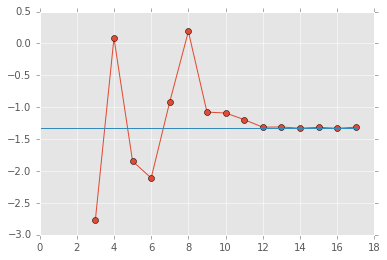

In [95]:
plt.plot(range(3,18),exp_List,'o-')
plt.plot(range(18),prec*np.ones(18))

it becomes very good near N = 4000 

In [90]:
range(3,18)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

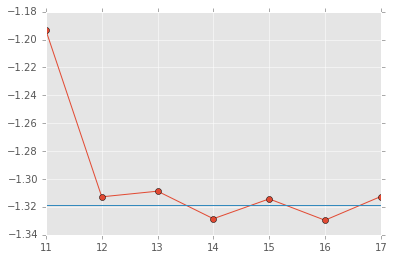

In [94]:
plt.plot(range(11,18),exp_List[8:], 'o-')
plt.plot(range(11,18),prec*np.ones(7))